# 2.1 SVD Applications Based on MovieLens Dataset

## Imports

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.linalg import svd
from scipy.sparse.linalg import svds
from matplotlib.patches import Patch 
from sklearn.metrics import mean_squared_error
from datetime import datetime, date, timedelta
from sklearn.model_selection import train_test_split

## Data Loading

In [26]:
df_ratings = pd.read_csv("../data/movielens/u.data", delimiter="\t", header=None, names=["user_id", "movie_id", "rating", "timestamp"])
df_movies  = pd.read_csv("../data/movielens/u.item", delimiter="|", encoding="latin-1",header=None, names=["movie_id", "title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])
df_users   = pd.read_csv("../data/movielens/u.user", delimiter="|", header=None, names=["user_id", "age", "gender", "occupation", "zip_code"])

In [27]:
df_ratings.head()

user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

In [28]:
df_movies.head()

movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0          0       0        0   
1          1          0           0  ...        0          0       0        0   
2          0          0           0  ...        0          0       0        0   
3          0          0           0  ...        0          0       0        0   
4          0          0           0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0       0         1    0        0  
2        0        0       0         1    0        0  
3        0        0       0         0    0        0  
4        0        0       0         1    0        0  

[5 rows x 24 columns]

In [29]:
df_users.head()

user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

### SVD IMPLEMENTATION

Para cada usuario, calculamos su promedio de calificaciones y lo restamos a cada calificación para centrar los datos

In [30]:
user_movie_matrix = df_ratings.pivot_table(
    index='user_id', 
    columns='movie_id', 
    values='rating'
)

user_movie_matrix_filled = user_movie_matrix.fillna(0)

user_ratings_mean = user_movie_matrix.mean(axis=1)

matrix_demeaned = user_movie_matrix_filled.subtract(
    user_ratings_mean, axis='rows'
)

matrix_demeaned

movie_id      1         2         3         4         5         6     \
user_id                                                                
1         1.389706 -0.610294  0.389706 -0.610294 -0.610294  1.389706   
2         0.290323 -3.709677 -3.709677 -3.709677 -3.709677 -3.709677   
3        -2.796296 -2.796296 -2.796296 -2.796296 -2.796296 -2.796296   
4        -4.333333 -4.333333 -4.333333 -4.333333 -4.333333 -4.333333   
5         1.125714  0.125714 -2.874286 -2.874286 -2.874286 -2.874286   
...            ...       ...       ...       ...       ...       ...   
939      -4.265306 -4.265306 -4.265306 -4.265306 -4.265306 -4.265306   
940      -3.457944 -3.457944 -3.457944 -1.457944 -3.457944 -3.457944   
941       0.954545 -4.045455 -4.045455 -4.045455 -4.045455 -4.045455   
942      -4.265823 -4.265823 -4.265823 -4.265823 -4.265823 -4.265823   
943      -3.410714  1.589286 -3.410714 -3.410714 -3.410714 -3.410714   

movie_id      7         8         9         10    ...      1673      1674  \
user_id                                           ...                       
1         0.389706 -2.610294  1.389706 -0.610294  ... -3.610294 -3.610294   
2        -3.709677 -3.709677 -3.709677 -1.709677  ... -3.709677 -3.709677   
3        -2.796296 -2.796296 -2.796296 -2.796296  ... -2.796296 -2.796296   
4        -4.333333 -4.333333 -4.333333 -4.333333  ... -4.333333 -4.333333   
5        -2.874286 -2.874286 -2.874286 -2.874286  ... -2.874286 -2.874286   
...            ...       ...       ...       ...  ...       ...       ...   
939      -4.265306 -4.265306  0.734694 -4.265306  ... -4.265306 -4.265306   
940       0.542056  1.542056 -0.457944 -3.457944  ... -3.457944 -3.457944   
941      -0.045455 -4.045455 -4.045455 -4.045455  ... -4.045455 -4.045455   
942      -4.265823 -4.265823 -4.265823 -4.265823  ... -4.265823 -4.265823   
943      -3.410714 -3.410714 -0.410714 -3.410714  ... -3.410714 -3.410714   

movie_id      1675      1676      1677      1678      1679      1680  \
user_id                                                                
1        -3.610294 -3.610294 -3.610294 -3.610294 -3.610294 -3.610294   
2        -3.709677 -3.709677 -3.709677 -3.709677 -3.709677 -3.709677   
3        -2.796296 -2.796296 -2.796296 -2.796296 -2.796296 -2.796296   
4        -4.333333 -4.333333 -4.333333 -4.333333 -4.333333 -4.333333   
5        -2.874286 -2.874286 -2.874286 -2.874286 -2.874286 -2.874286   
...            ...       ...       ...       ...       ...       ...   
939      -4.265306 -4.265306 -4.265306 -4.265306 -4.265306 -4.265306   
940      -3.457944 -3.457944 -3.457944 -3.457944 -3.457944 -3.457944   
941      -4.045455 -4.045455 -4.045455 -4.045455 -4.045455 -4.045455   
942      -4.265823 -4.265823 -4.265823 -4.265823 -4.265823 -4.265823   
943      -3.410714 -3.410714 -3.410714 -3.410714 -3.410714 -3.410714   

movie_id      1681      1682  
user_id                       
1        -3.610294 -3.610294  
2        -3.709677 -3.709677  
3        -2.796296 -2.796296  
4        -4.333333 -4.333333  
5        -2.874286 -2.874286  
...            ...       ...  
939      -4.265306 -4.265306  
940      -3.457944 -3.457944  
941      -4.045455 -4.045455  
942      -4.265823 -4.265823  
943      -3.410714 -3.410714  

[943 rows x 1682 columns]

Creamos cada matriz necesaria para el analisis, donde cada uno significa:
- U -> usuarios x k: que tanto se relaciona cada usuario con cada factor latente
- Sigma -> k x k: importancia de cada factor latente
- Vt -> k x peliculas: que tanto se relaciona cada pelicula con cada factor latente

In [31]:
k = 50

U, sigma, Vt = svds(matrix_demeaned.values, k=k)

sigma_diag = np.diag(sigma)

# Matriz completa
predicted_ratings = np.dot(np.dot(U, sigma_diag), Vt)

# Sumamos la media de cada usuario a las predicciones para obtener las predicciones finales/reales
predicted_ratings_df = pd.DataFrame(
    predicted_ratings + user_ratings_mean.values.reshape(-1, 1),
    index=user_movie_matrix.index,
    columns=user_movie_matrix.columns
)

predicted_ratings_df

movie_id      1         2         3         4         5         6     \
user_id                                                                
1         5.842801  2.720230  1.550652  3.101871  1.523779  1.194131   
2         2.058932  0.049930 -0.083275  0.389340  0.137356  0.431406   
3         0.460571 -0.206038 -0.144345 -0.185451  0.028123 -0.075990   
4         0.561199 -0.384815  0.061436  0.001580  0.094783 -0.021134   
5         4.144944  1.897990  0.017291  1.029591  0.633521 -0.027666   
...            ...       ...       ...       ...       ...       ...   
939       1.582262 -0.133086 -0.227962 -0.198831  0.335259 -0.008100   
940       0.672242 -0.328217 -0.215089  2.099459  0.434401  0.050482   
941       3.127078 -0.057279  0.514042 -0.067919 -0.164672 -0.038814   
942       0.763311  0.529255  0.432910 -0.349444  0.419128 -0.034392   
943       1.211425  2.832815  1.757987  1.840429  1.067315  0.296645   

movie_id      7         8         9         10    ...      1673      1674  \
user_id                                           ...                       
1         3.828179  0.921544  1.297013  3.458341  ...  0.009777 -0.045220   
2         0.202016  0.227137  1.778261  0.679035  ... -0.004301 -0.029344   
3        -0.132473  0.456246  0.073892  0.297958  ... -0.023721 -0.028135   
4         0.120033 -0.208577  0.043399 -0.067501  ...  0.024070  0.012995   
5         1.861726  1.009111  0.224007  0.546300  ...  0.018917 -0.051996   
...            ...       ...       ...       ...  ...       ...       ...   
939      -0.293766  1.141792  3.038772 -0.091152  ...  0.041570  0.038023   
940       3.374610  2.663343  2.406975 -0.582041  ... -0.014751  0.001112   
941       2.285278  0.456368  0.731200  0.065514  ... -0.005065  0.002344   
942      -0.221820  1.652611 -0.663845 -0.670465  ...  0.014073  0.054188   
943       1.266095  0.117130  1.843279 -0.515309  ... -0.001982 -0.116795   

movie_id      1675      1676      1677      1678      1679      1680  \
user_id                                                                
1        -0.089169 -0.071711  0.009836 -0.037982 -0.040359 -0.039171   
2        -0.040223 -0.035278 -0.030746 -0.021376 -0.013355 -0.017365   
3         0.051758  0.031405 -0.019637  0.005304  0.034515  0.019910   
4         0.013693  0.015392  0.026084  0.023709  0.033544  0.028626   
5        -0.023527 -0.011312 -0.038772  0.010033  0.003866  0.006950   
...            ...       ...       ...       ...       ...       ...   
939       0.082309  0.062194  0.059534  0.015549  0.002719  0.009134   
940      -0.037688 -0.032421 -0.001772 -0.014553  0.000113 -0.007220   
941      -0.031256 -0.017727  0.002098  0.006402  0.000546  0.003474   
942       0.033511  0.021653 -0.015795  0.002757  0.012395  0.007576   
943      -0.098008 -0.078238 -0.030860 -0.048520 -0.068161 -0.058341   

movie_id      1681      1682  
user_id                       
1        -0.011228  0.024358  
2         0.010200 -0.055737  
3        -0.006175 -0.001561  
4         0.013146  0.000469  
5        -0.017542 -0.001303  
...            ...       ...  
939       0.059626  0.004028  
940      -0.040007 -0.086749  
941       0.005768  0.002766  
942       0.024448  0.008045  
943      -0.023869  0.009821  

[943 rows x 1682 columns]

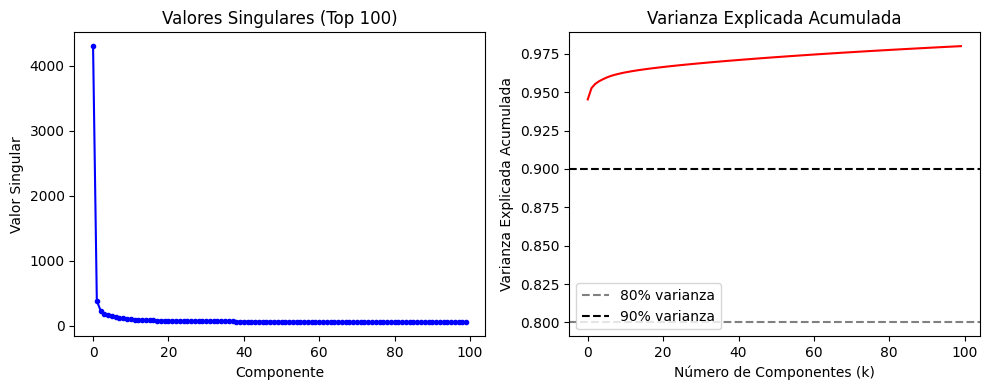

In [ ]:
U_full, sigma_full, Vt_full = svd(matrix_demeaned.values, full_matrices=False)

explained_variance = (sigma_full**2) / np.sum(sigma_full**2)
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(sigma_full[:100], 'b-o', markersize=3)
plt.title('Valores Singulares (Top 100)')
plt.xlabel('Componente')
plt.ylabel('Valor Singular')

plt.subplot(1, 2, 2)
plt.plot(cumulative_variance[:100], 'r-')
plt.axhline(y=0.8, color='gray', linestyle='--', label='80% varianza')
plt.axhline(y=0.9, color='black', linestyle='--', label='90% varianza')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes (k)')
plt.ylabel('Varianza Explicada Acumulada')
plt.legend()

plt.tight_layout()
plt.show()

Vemos que el componente 0 domina contra los demas, lo cual indica que hay patron global extremadamente fuerte (peliculas famosas son rateadas de manera alta). 

Ademas, vemos que k=1 ya explica mas del 90% de la varianza, teniendo a k=50 en ~97.5.

Esto sucedio ya que los valores NaN se rellenaron con 0 para permitir la descomposición de la matriz. Esto provoca que el primer valor singular domine, ya que SVD termina capturando el patrón de dispersión (sparsity). Una mejora sería rellenar usando el promedio de calificación de cada usuario, para reducir este sesgo.

### Crear las recomendaciones para cada usuario

In [33]:
def recommend_movies(user_id, n=10):
    # Get predicted ratings for the user and sort them
    user_predictions = predicted_ratings_df.loc[user_id].sort_values(ascending=False)
    
    # Get list of movies the user has already rated
    already_rated = df_ratings[df_ratings['user_id'] == user_id]['movie_id'].tolist()
    
    recommendations = user_predictions.drop(already_rated, errors='ignore')
    
    # Get top N recommendations
    top_n = recommendations.head(n).reset_index()
    top_n.columns = ['movie_id', 'predicted_rating']
    
    return top_n.merge(df_movies[['movie_id', 'title']], on='movie_id')

recommend_movies(user_id=196, n=10)

movie_id  predicted_rating                           title
0       216          1.678190  When Harry Met Sally... (1989)
1       204          1.531826       Back to the Future (1985)
2       451          1.361694                   Grease (1978)
3        88          1.326184     Sleepless in Seattle (1993)
4       258          1.289302                  Contact (1997)
5       303          1.240529              Ulee's Gold (1997)
6       732          1.209538                     Dave (1993)
7        14          1.179925              Postino, Il (1994)
8       209          1.156572       This Is Spinal Tap (1984)
9       274          1.142637                  Sabrina (1995)

### Train/Test nuestra prediccion de peliculas usando RSME (Raíz del Error Cuadrático Medio)

In [ ]:
train_data, test_data = train_test_split(df_ratings, test_size=0.2, random_state=42)

train_matrix = train_data.pivot_table(
    index='user_id', columns='movie_id', values='rating'
).fillna(0)

train_mean = train_matrix.mean(axis=1)
train_demeaned = train_matrix.subtract(train_mean, axis='rows')

U_t, s_t, Vt_t = svds(train_demeaned.values, k=k)
preds = np.dot(np.dot(U_t, np.diag(s_t)), Vt_t)
preds_df = pd.DataFrame(
    preds + train_mean.values.reshape(-1,1),
    index=train_matrix.index,
    columns=train_matrix.columns
)

# Evaluar predicciones en el conjunto de prueba
actuals, predictions = [], []
for _, row in test_data.iterrows():
    uid, mid, actual = row['user_id'], row['movie_id'], row['rating']
    if uid in preds_df.index and mid in preds_df.columns:
        actuals.append(actual)
        predictions.append(preds_df.loc[uid, mid])

rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"RMSE: {rmse:.4f}")

RMSE: 2.8785


Se obtuvo un RMSE de **2.88**, lo cual indica un error promedio de casi 3 puntos en la escala de 1-5. Este resultado se atribuye principalmente al relleno de valores faltantes con 0, lo que introduce un sesgo significativo en la descomposición. Una mejora directa sería reemplazar los NaN con la media de calificaciones de cada usuario antes de aplicar SVD, lo cual reduciría el dominio del primer componente singular y mejoraría la capacidad predictiva del modelo.

### Visualizacion de Espacio Latente

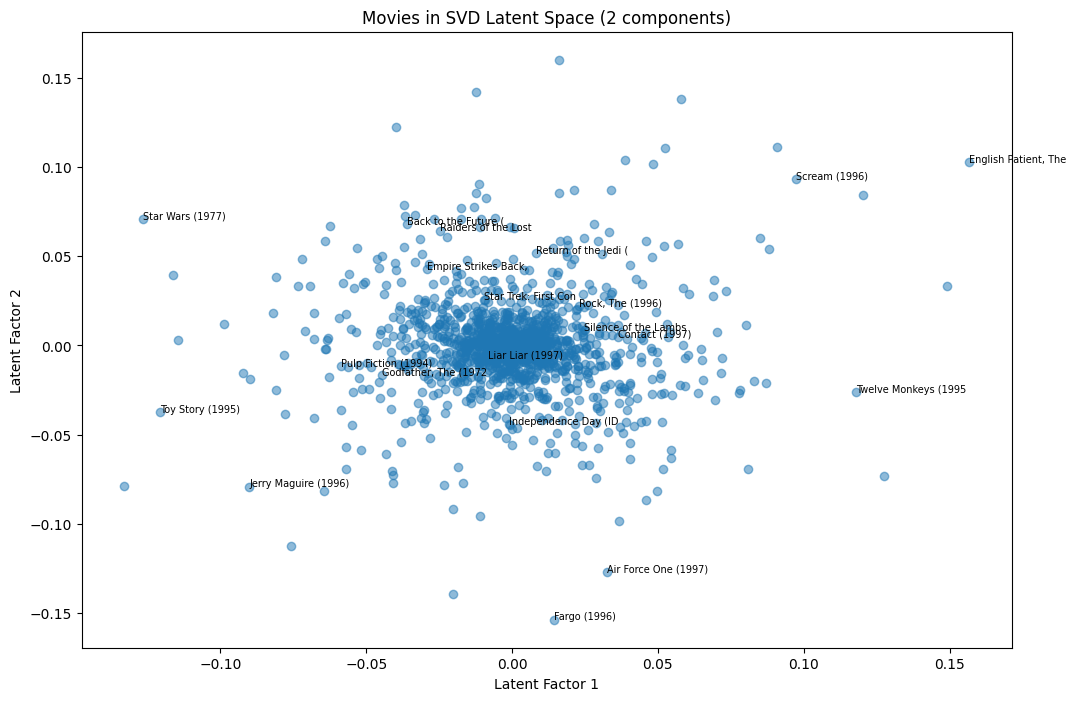

In [ ]:
movie_factors = Vt[:2, :].T 

# Visualizamos las películas en 2D usando los primeros 2 factores latentes
# Las filas de Vt son los factores latentes, las columnas son las películas que transponemos para tener (n_peliculas, 2)
movie_factors_df = pd.DataFrame(
    movie_factors, 
    index=user_movie_matrix.columns,
    columns=['Factor_1', 'Factor_2']
).reset_index()

# Le hacemos merge con los títulos para poder etiquetar después
movie_factors_df = movie_factors_df.merge(
    df_movies[['movie_id', 'title']], on='movie_id'
)

plt.figure(figsize=(12, 8))
plt.scatter(movie_factors_df['Factor_1'], movie_factors_df['Factor_2'], alpha=0.5)

top_movies = df_ratings['movie_id'].value_counts().head(20).index
for _, row in movie_factors_df[movie_factors_df['movie_id'].isin(top_movies)].iterrows():
    plt.annotate(row['title'][:20], (row['Factor_1'], row['Factor_2']), fontsize=7)

plt.title('Peliculas en el Espacio Latente de SVD (2 componentes)')
plt.xlabel('Factor Latente 1')
plt.ylabel('Factor Latente 2')
plt.show()

El espacio latente revela que el Factor 1 captura popularidad general, mientras que el Factor 2 distingue géneros: películas de acción/aventura se concentran en valores positivos del Factor 2, mientras que dramas y thrillers tienden a valores negativos.